# **ETL (Extract, Transform, Load) in Snowflake:**
* Snowflake doesn't use traditional orchestration tools or UI-based drag-and-drop. Instead, it provides distinct objects for building data pipelines.
* The strength of Snowflake's approach lies in combining these objects to create a robust data pipeline and automate the entire injection-to-transformation process.
* Key objects: pipes, streams, and tasks. They can work independently, but their full potential is realized when used together.
* Data extraction isn't done within Snowflake. Data must be extracted externally and stored in a cloud storage location before ingestion.
* Once data is ingested into Snowflake, enrichment and loading into the consumption layer for user analytics can occur.
* In Snowflake's context, "ETL" could be more accurately termed **"ITL"** **`(Ingestion, Transformation, Loading)`**.
* Components such as pipes facilitate data ingestion. Streams and tasks handle orchestration (including Change Data Capture), and standard SQL commands are used for enrichment.
* Understanding the synergy between pipe, stream, and task functionalities is essential.
* Integration of stream and task functionalities ensures smooth operation of the workflow.
* The speed of data movement from source to consumption layer, maintaining data integrity, and preventing duplication are vital considerations.
* Merge SQL statements play a crucial role in the comprehensive ETL workflow.
Proficiency in orchestrating these components is crucial to harness Snowflake's capabilities effectively.
A practical video tutorial provides hands-on insights into building and


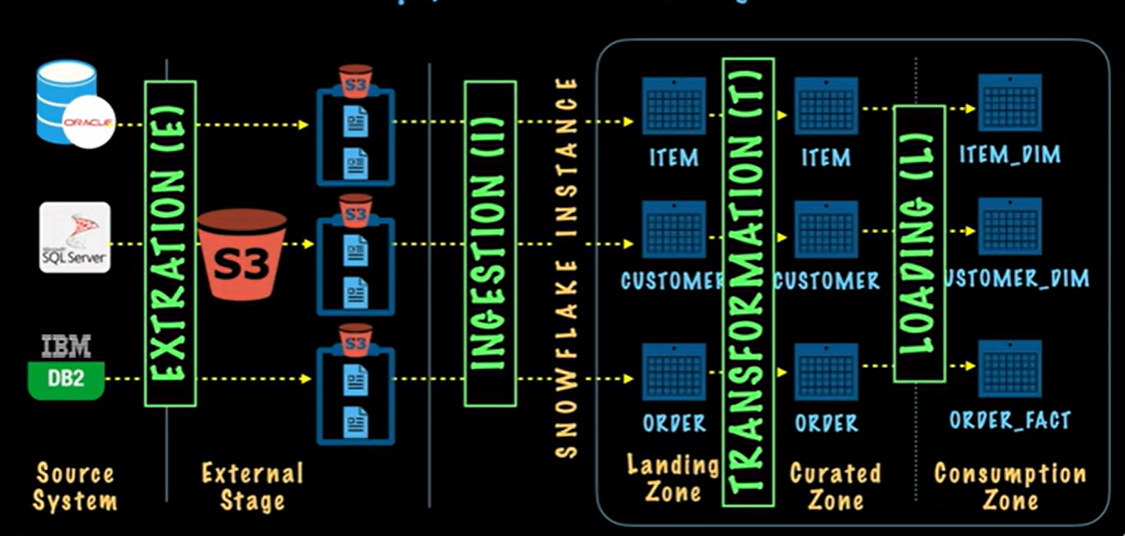


# **ETL (Extract, Transform, Load):**
* ETL combines three essential processes for moving data to a unified repository.
**`Extraction:`** Raw data is fetched from various sources, such as CRMs, IoT sensors, etc.
**`Transformation:`** Data is modified to match organizational requirements and storage solutions.
**`Loading:`** Data is prepared and secured for sharing, including potential overwriting of existing data.

**ELT (Extract, Load, Transform):**

ELT is a variant where data is extracted and loaded before transformation.
Common for consolidating data in scalable cloud-based data warehouses.

**Similarities of ETL and ELT:**

Both unify data from multiple sources into a consistent, qualified repository.
Provides simplified access for analysis, ensuring data consistency.



**Advantages of ELT:**

* **`Flexibility:`** Cloud-based data warehouses enable ELT for structured and unstructured data.
* **`Accessibility:`** ELT allows easier access and use by employees.
* **`Scalability:`** ELT is more accessible to a broader range of businesses due to cloud-based solutions.
* **`Faster Load & Transformation:`** ELT reduces load and transformation times as compared to traditional ETL.
* **`Simplified Data Maintenance:`** ELT preserves original data, minimizing the need for re-sourcing and reloading.

**Snowflake for ETL and ELT:**

* Snowflake supports both ETL and ELT, working with popular integration tools like Informatica, Talend, and more.
* Snowpark, a developer framework, enables processing pipelines in Python, Java, and Scala, enhancing data processing efficiency.
* This empowers data engineers, scientists, and developers to optimize data strategies and pipeline projects effectively.







# Customer sales order usecase:

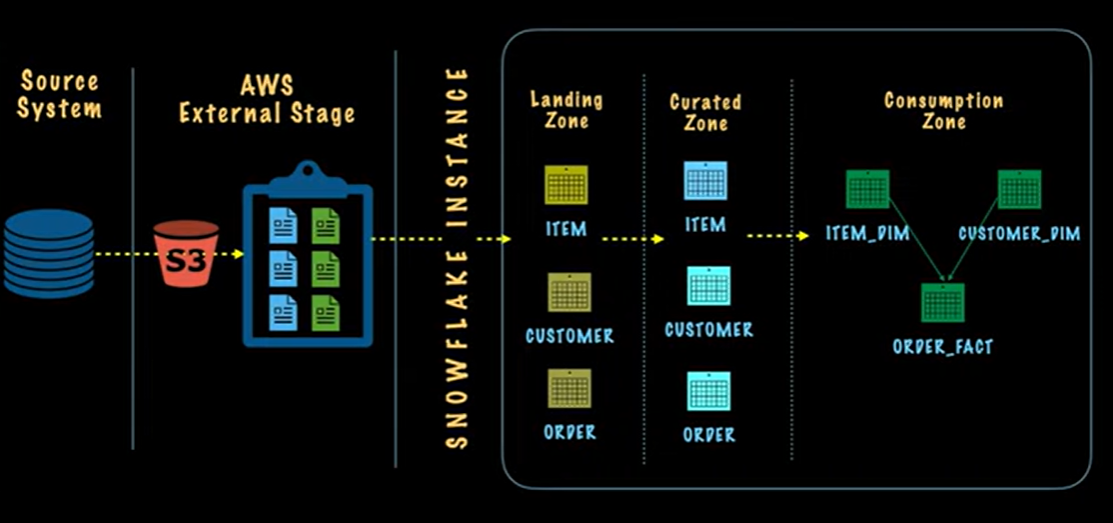

1. **Data Source to External Stage:**

Customer, item, and order data originates from a source system.
Data must transition from the source (e.g., an RDBMS database) to Snowflake's consumption layer.
2. **External Stage Ingestion:**

As Snowflake operates in the cloud, data from the source is extracted and placed in an external stage, such as an S3 bucket.
3. **Snowflake Cloud Data Warehouse Ingestion:**

Data in the external stage is ingested into Snowflake's cloud data warehouse.
4. **CDC (Change Data Capture) Setup:**

* Snowflake's objects come into play to handle CDC.
* Snowpipe objects are established for each table, utilizing S3 notification services for automatic data loading as new datasets arrive.
5. **Landing Zone:**

* Raw data (item, customer, order) is loaded into the landing zone.
* Stream object is created for the landing zone to capture CDC.
6. **Moving Data to Curated Zone:**

* Tasks and task trees are set up to facilitate the transition from the landing zone to the curated zone.
* Merge statement within tasks handles data updates, inserts, and deletes.
7. **Curated Zone Stream:**

* Stream objects are created within the curated zone to track changes.
8. **Consumption Zone Setup:**

* Tasks are established in the consumption zone to load curated data into the consumption/analytics layer.
9. **Initial Data Loading:**

* The initial data load occurs using Snowflake's legacy web UI.
* Insert-as-select statements populate landing, curated, and consumption zone tables.
10. **Stream and Task Integration:**

* Stream and task objects are created to enable CDC and continuous data flow.
* A stream-enabled task includes an additional dependency parameter to execute SQL statements only if the stream contains data.
11. **Data Maintenance and Delta Loading:**

* New delta data is manually loaded into an S3 bucket as CSV files.
12. **Notification Services Setup:**

* SNS (Simple Notification Service) triggers notifications, invoking Snowpipe upon the arrival of new delta CSV files.
13. **Delta Data Processing:**

* Pipe objects are created for processing and loading delta files.
* Stream objects are generated in the landing schema to capture changes.









## **Task and Stream Interaction:**
 CDC within the landing layer triggers tasks and task trees, which load raw data to the curated schema and capture changes.



In [ ]:
create or replace task my_task
     warehouse ="COMPUTE_WH"
     schedule= "5 minuites"
     when
     stystem$stream_has_data("my_stream")
     as
     insert into customer_dim ..............

* . **Consumption Layer Update:**
  Tasks in the consumption layer update the analytics layer with the latest data.
* . **Continuous Data Flow:**
  This process ensures seamless data flow from source to consumption layer.Snowflake's ETL (or ITL) process works automatically whenever new data arrives in the S3 bucket.

* . **Efficiency and Speed:**
  For delta files under 100 MB, data can move from left to right within minutes.This approach minimizes manual intervention and maximizes efficiency. Remember to follow this sequence in your project to ensure proper functioning and optimized ETL/ITL processes.

## **How many tables are needed for this process:**

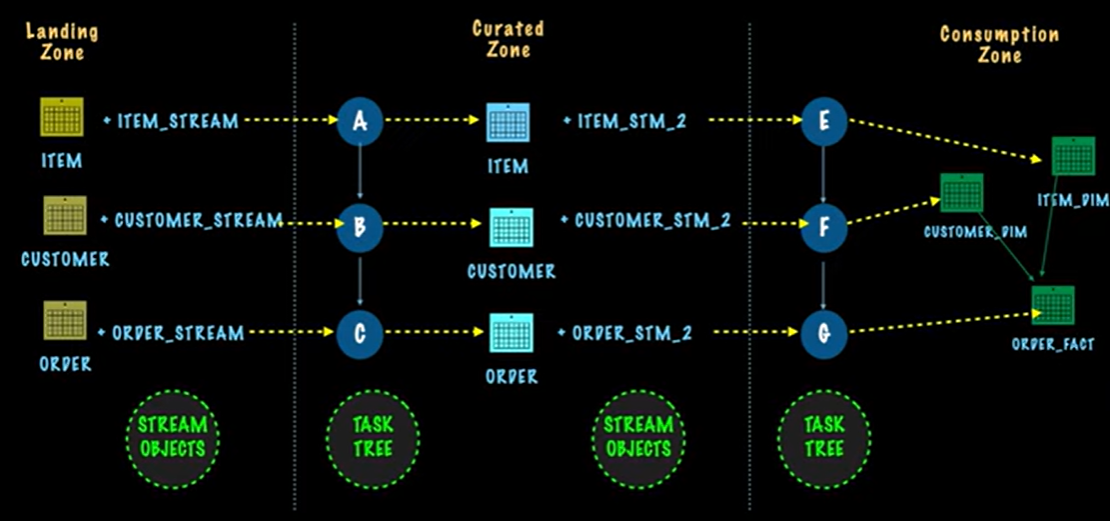

This ETL scenario encompasses three tables at each layer, resulting in a total of nine tables. Data progression occurs as follows:

* **Source to Consumption:**

  * Data travels from the source location to an S3 bucket, then to the landing zone schema, the curated zone schema, and, ultimately, the consumption zone schema.
* **Initial Data Load:**

  * All tables under various schemas are created.
  * Sample data is loaded via the web UI to complete the initial history data load.
* **Stream Creation:**

  * Three stream objects are generated: item stream, customer stream, and order stream for the landing zone tables.
  * Streams monitor changes within these tables.
* **CDC Tasks:**

  * Three tasks are established or organized into a task tree.
  * Scheduled to run sequentially, they operate on the frequency specified (e.g., every first, second, and third minute).
  * Tasks process CDC data from the streams and populate the curated zone's respective tables.
* **Curated Zone Stream:**

Similarly, three stream objects are created within the curated zone.
These streams capture and process delta data from the curated tables.
* **Consumption Zone Task:**

  * A task or task tree is set up for the consumption zone.
  * Scheduled at a designated frequency.
  * Task reads delta data from curated zone tables and populates fact and dimension tables within the consumption zone.

## **In summary:**

* Landing Zone: 3 tables, 3 streams, 3 tasks
* Curated Zone: 3 tables, 3 streams
* Consumption Zone: 3 tables, 3 tasks

This structure totals to 24 objects. Additionally, you might require stage objects, file formats, and potentially sequence objects. With a more extensive table count, the complexity of the Snowflake project increases. While there are tools available to simplify such intricate ETL approaches within Snowflake, becoming proficient in this ecosystem entails more than just understanding object creation.







